In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [7]:
f = open('weibull.txt', 'r')
data = np.array([])
for s in f:
    data = np.append(data, float(s))
f.close()
print data.shape

(3652,)


### a) первые 4 года. Туда точно попал один високосный, значит это 355*3 + 366 дней

In [13]:
sample = data[:(355*3 + 366)]
sample.shape

(1431,)

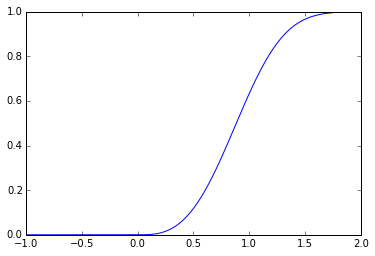

In [49]:
from math import *

from scipy.stats import rv_continuous
class my_distr(rv_continuous):
    def _pdf(self, x):
        if (x >= 0.):
            return 1. - exp(-1.*x)
        else:
            return 0.
        
distr = my_distr(name='lal')

gamma = 3

X = np.arange(-1, 2, .01)
y = np.array([distr.pdf(np.power(x,gamma)) for x in X])
plt.plot(X, y)

### $ p(x) = F'(x) = \gamma \cdot x^{\gamma-1} \cdot e^{-x^\gamma} $
### $ ln(p_i) = ln(\gamma) + (\gamma-1)\cdot ln(x) - x^\gamma$
### ${f}$ монотонна, значит по методу максимального правдоподобия:
### ${f} = p(X_{1})...p(X_{N}) \rightarrow max$ - то же самое, что
### $ L = ln(f) = \sum_{1}^{N}{ln(p_{i})} = N\cdot ln(\gamma) + (\gamma-1)\cdot \sum_{1}^{N}ln(X_{i}) - \sum_{1}^{N}X_{i}^{\gamma} \rightarrow max$

In [99]:
N = len(sample)
def L(lngamma):
    return N*lngamma + (np.power(10,lngamma)-1)*(np.log(sample).sum()) - (np.power(sample,np.power(10,gamma))).sum()
lngammaLine = np.arange(-2, 2, .001)
res = np.argmax([L(lngamma) for lngamma in lngammaLine])
print lngammaLine[res]
print np.power(10, lngammaLine[res])

1.144
13.9315680294


### b) то же самое, только теперь выборка полная

In [100]:
sample = data
N = len(sample)
res = np.argmax([L(lngamma) for lngamma in lngammaLine])
print lngammaLine[res]
print np.power(10, lngammaLine[res])

1.15
14.1253754462
